Many of the ideas in this tutorial are simplified versions of what is discussed in 

```
    Priebe, C. E., Park, Y., Vogelstein, J. T., Conroy, J. M., Lyzinski, V., Tang, M., ... & Bridgeford, E. (2019). On a two-truths phenomenon in spectral graph clustering. Proceedings of the National Academy of Sciences, 116(13), 5995-6000.
```

Create an affinity network

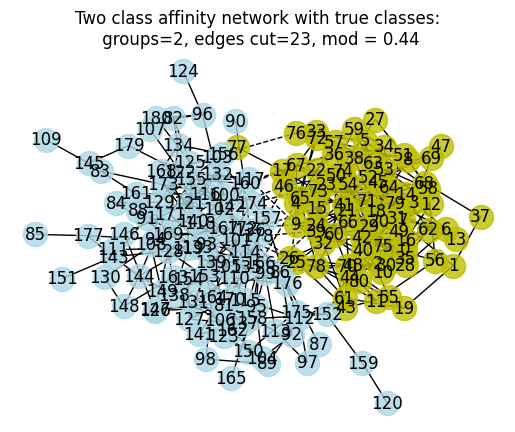

In [41]:
##############
### Cell 1 ###
##############

import numpy as np
from Girvan_Newman_stochastic_block_network_v2 import AssortativeMixing
from partitioning_utilities import show_dendrogram
from partitioning_utilities import show_partitions

a = 0.4
b = 0.02
c = 0.4
M = np.array([[a,b],[b,c]])
affinity_network = AssortativeMixing(M, num_edges=400)
G = affinity_network.G

group_ids: list[int] = list({G.nodes[node]["node_class"] for node in G.nodes()})
partition: list[set[int]] = []
for group_id in group_ids:
    group: set[int] = {node for node in G.nodes() if G.nodes[node]["node_class"] == group_id}
    partition.append(set(group))

show_partitions(G, partition, title="Two class affinity network with true classes:\n")

Look at dendrogram

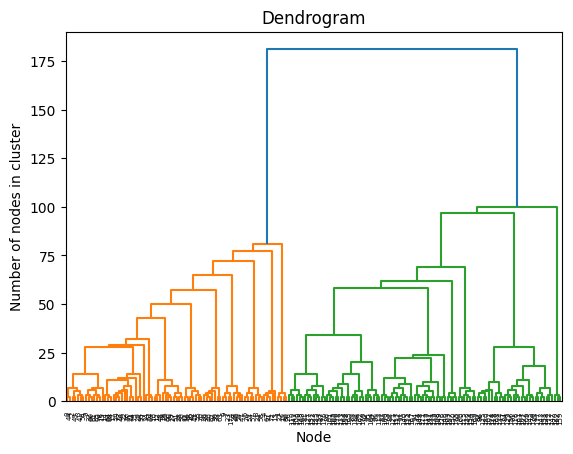

In [42]:
##############
### Cell 2 ###
##############
import networkx as nx
def largest_component(graph):
    # Find all connected components
    components = nx.connected_components(graph)
    
    # Get the largest component
    largest = max(components, key=len)
    
    return graph.subgraph(largest)

H = largest_component(G)

show_dendrogram(H)

Look at kcores

In [43]:
from matplotlib.lines import Line2D
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

def show_kCores(G):
    """ Visualize by k-cores. 
    Thanks to [Corralien's response on stackoverflow]
    (https://stackoverflow.com/questions/70297329/visualization-of-k-cores-using-networkx).
    """
    # build a dictionary of k-level with the list of nodes
    kcores = defaultdict(list)
    for n, k in nx.core_number(G).items():
        kcores[k].append(n)

    # compute position of each node with shell layout
    nlist = []
    for k in sorted(kcores.keys(),reverse=True):
        nlist.append(kcores[k])
    pos = nx.layout.shell_layout(G, nlist = nlist)
    colors = ['black','lightblue','yellow','magenta','olive', 'cyan']
    legend_elements = []

    # draw nodes, edges and labels
    for kcore in sorted(list(kcores.keys()),reverse = True):
        nodes = kcores[kcore]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[kcore%len(colors)])
        label = f"kcore = {kcore}"
        color = colors[kcore%len(colors)]
        legend_elements.append(Line2D([0], [0], marker='o', color=color, label=label,markerfacecolor=color, markersize=15))
    nx.draw_networkx_edges(G, pos, width=0.2)
    nx.draw_networkx_labels(G, pos)
    plt.title("K-core layout of network")
    plt.legend(handles = legend_elements, loc = 'best')


In [44]:

def show_kCores_by_partition(G, colors, title = "K-core of Network"):
    """ Visualize by k-cores. 
    Thanks to [Corralien's response on stackoverflow]
    (https://stackoverflow.com/questions/70297329/visualization-of-k-cores-using-networkx).
    """
    # build a dictionary of k-level with the list of nodes
    kcores = defaultdict(list)
    for n, k in nx.core_number(G).items():
        kcores[k].append(n)

    # Shapes
    shapes = ["o", "v", "s", "*", "+", "d"]

    # compute position of each node with shell layout
    nlist = []
    for k in sorted(kcores.keys(),reverse=True):
        nlist.append(kcores[k])
    pos = nx.layout.shell_layout(G, nlist = nlist)
    legend_elements = []

    # draw nodes, edges and labels
    for kcore in sorted(kcores.keys(),reverse=True):
        nodes = kcores[kcore]
        shape = shapes[kcore%len(shapes)]
        
        #nx.draw_networkx_nodes(self.G, pos, nodelist=nodes, node_color=colors[nodes[0]], node_shape=shape, alpha = 0.5, node_size=90)
        for node in nodes:
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=colors[node], node_shape=shape, alpha = 0.5, node_size=90)
        label = f"kcore = {kcore}"
        legend_elements.append(Line2D([0], [0], marker=shape, color='k', markerfacecolor = 'w', label=label, markersize=10))
    
    nx.draw_networkx_edges(G, pos, width=0.1)
    #nx.draw_networkx_labels(self.G, pos)
    plt.title(title)
    plt.legend(handles = legend_elements, loc = 'best')



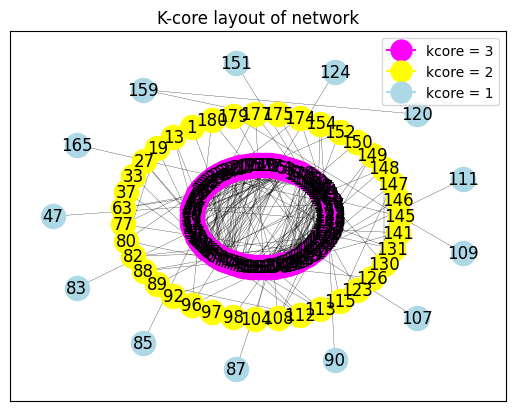

In [45]:

show_kCores(G)

Get first and second fiedler vector

[np.int64(0), np.int64(1)]


Text(0, 0.5, '$2^{nd}$ fiedler eigenvector')

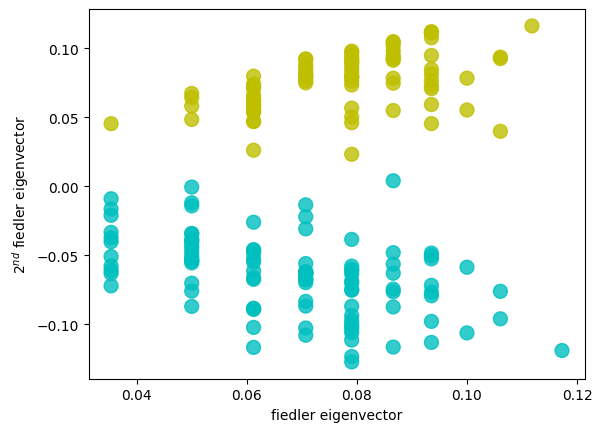

In [46]:
##############
### Cell 3 ###
##############

## REQUIRES pip install scikit-learn

import networkx as nx
from old_utilities import *
import matplotlib.pyplot as plt
L = nx.linalg.normalized_laplacian_matrix(G).toarray()
fiedler1, fiedler2 = get_two_fiedler_eigenvectors(L)
embedding = form_encoding(fiedler1, fiedler2)
colors = get_colors_from_clusters(embedding, num_clusters=2)
plt.scatter(embedding[:,0], embedding[:,1],s=100,alpha = 0.8, color = colors)
plt.xlabel("fiedler eigenvector")
plt.ylabel("$2^{nd}$ fiedler eigenvector")

Show graph partitioned into two clusters using the Laplacian embedding

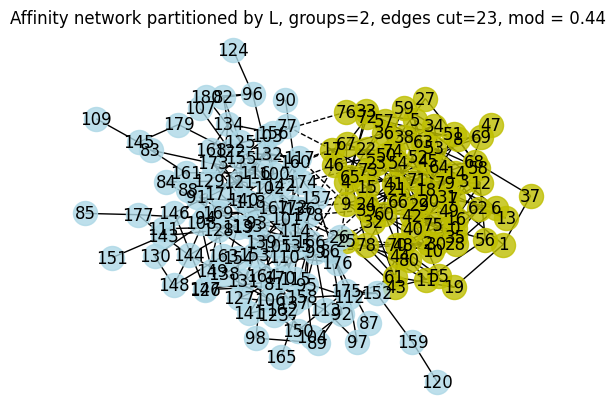

In [47]:
##############
### Cell 4 ###
##############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Affinity network partitioned by L")

Repeat but partition using adjacency matrix

Text(0, 0.5, 'values of $2^nd$ leading eigenvector of $A$')

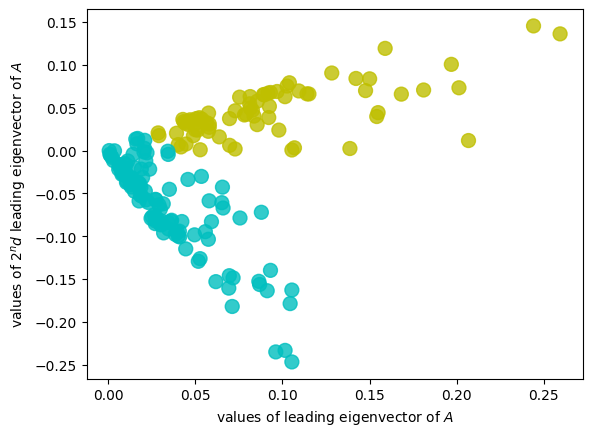

In [48]:
##############
### Cell 5 ###
##############

A = nx.linalg.adjacency_matrix(G).toarray()
principal1, principal2 = get_largest_vectors(A)
embedding = form_encoding(principal1, principal2)
colors = get_colors_from_clusters(embedding, num_clusters=2)
plt.scatter(embedding[:,0], embedding[:,1],s=100,alpha = 0.8, color = colors)
plt.xlabel('values of leading eigenvector of $A$')
plt.ylabel('values of $2^nd$ leading eigenvector of $A$')

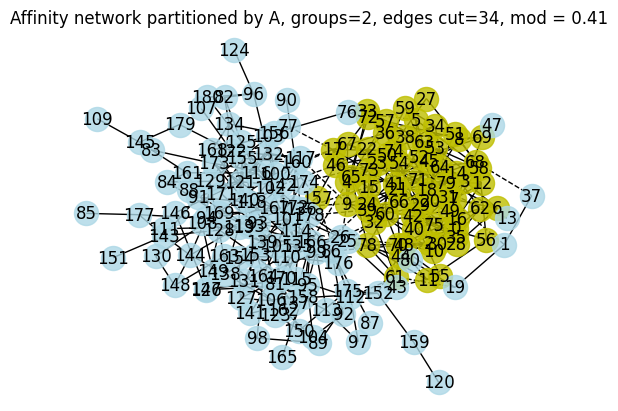

In [49]:
##############
### Cell 6 ###
##############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Affinity network partitioned by A")

Redraw to see which node classes belong n core and which belong in the periphery

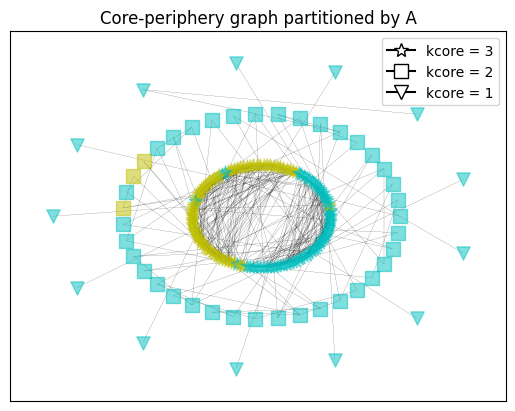

In [50]:
##############
### Cell 7 ###
##############

show_kCores_by_partition(G, colors, title="Core-periphery graph partitioned by A")

---

Create a core-periphery network

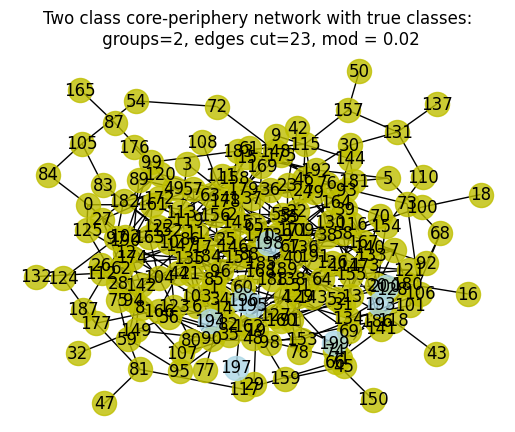

In [51]:
##############
### Cell 8 ###
##############

a = 0.4; b = 0.01; c = 0.001
M = np.array([[a,b],[b,c]])
core_periphery_network = AssortativeMixing(M=M, poisson_lambda=[4,4], num_edges=400)
G = core_periphery_network.G

group_ids: list[int] = list({G.nodes[node]["node_class"] for node in G.nodes()})
partition: list[set[int]] = []
for group_id in group_ids:
    group: set[int] = {node for node in G.nodes() if G.nodes[node]["node_class"] == group_id}
    partition.append(set(group))

show_partitions(G, partition, title="Two class core-periphery network with true classes:\n")



Look at dendrogram

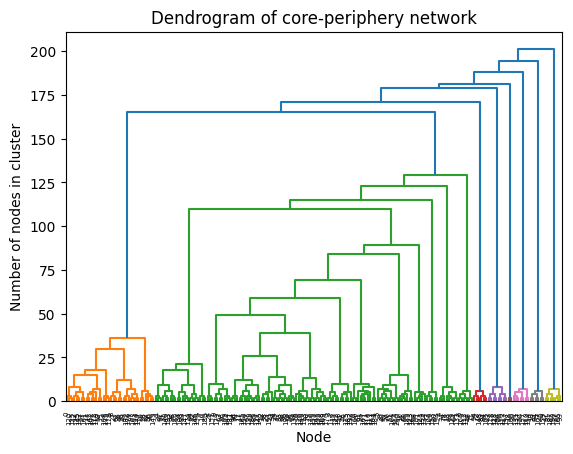

In [52]:
##############
### Cell 9 ###
##############

show_dendrogram(G,title="Dendrogram of core-periphery network")

Look at kcores

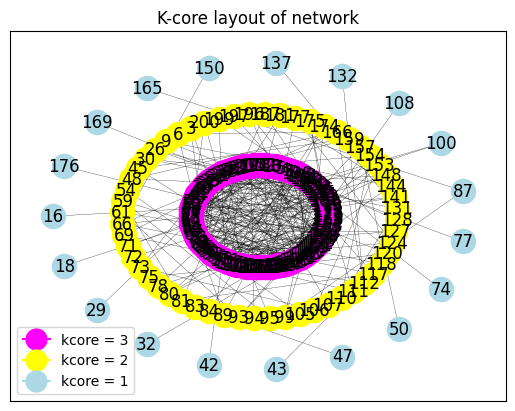

In [53]:
###############
### Cell 10 ###
###############

show_kCores(G)

Let's partition using the normalized Laplacian matrix

[np.int64(0), np.int64(13)]


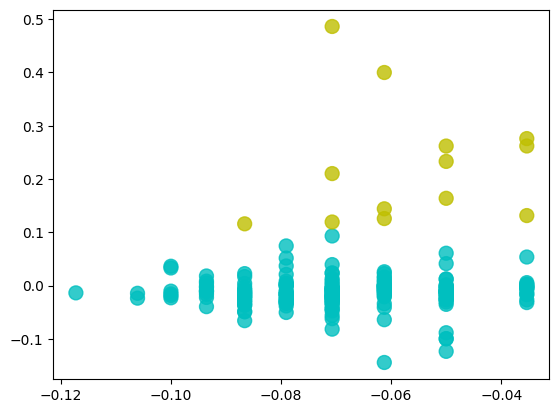

In [55]:
###############
### Cell 11 ###
###############

import networkx as nx
from old_utilities import *
import matplotlib.pyplot as plt
L = nx.linalg.normalized_laplacian_matrix(G).toarray()
fiedler1, fiedler2 = get_two_fiedler_eigenvectors(L)
embedding = form_encoding(fiedler1, fiedler2)
colors = get_colors_from_clusters(embedding, num_clusters=2)
plt.scatter(embedding[:,0], embedding[:,1],s=100,alpha = 0.8, color = colors);

Show partition

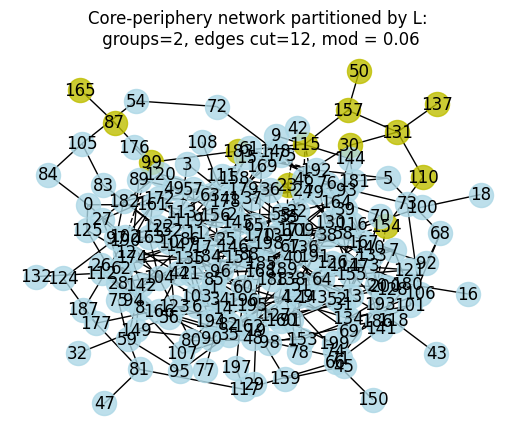

In [56]:
###############
### Cell 12 ###
###############
group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Core-periphery network partitioned by L:\n")

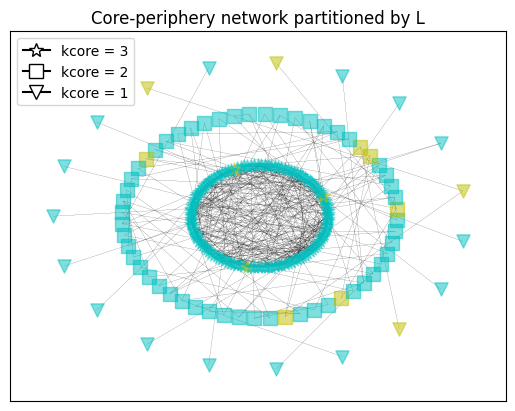

In [59]:
show_kCores_by_partition(G,colors,title = "Core-periphery network partitioned by L")

Repeat using the adjacency matrix

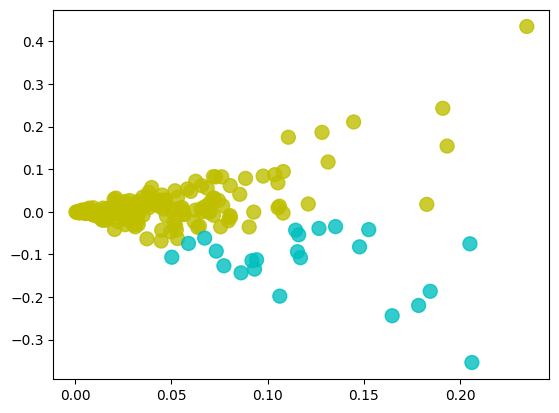

In [60]:
###############
### Cell 13 ##
###############

A = nx.linalg.adjacency_matrix(G).toarray()
principal1, principal2 = get_largest_vectors(A)
embedding = form_encoding(principal1, principal2)
colors = get_colors_from_clusters(embedding, num_clusters=2)
plt.scatter(embedding[:,0], embedding[:,1],s=100,alpha = 0.8, color = colors)

Show partition by adjacency matrix

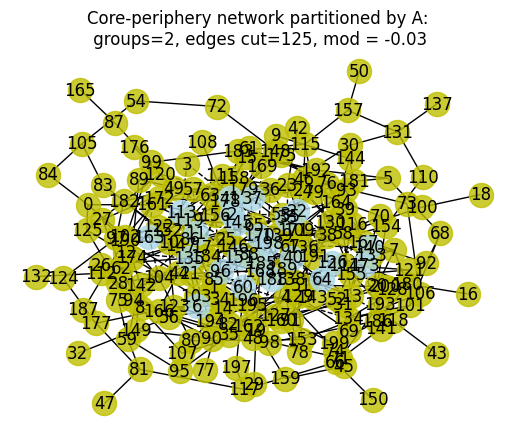

In [61]:
###############
### Cell 14 ###
###############

group1 = {node for node in G.nodes() if colors[node] == 'y'}
group2 = {node for node in G.nodes() if colors[node] == 'c'}

show_partitions(G, partition=(group1, group2), title="Core-periphery network partitioned by A:\n")

Redraw using the shell layout to see which class falls in core and which in periphery

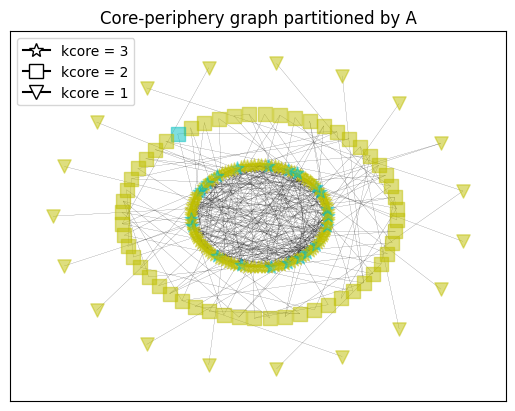

In [62]:
show_kCores_by_partition(G,colors, title="Core-periphery graph partitioned by A")